In [32]:
import pandas as pd
import numpy as np
import pickle

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#reviews=pd.read_csv("/content/drive/MyDrive/Capstone/reviews_dataset.xlsx")
sample=pd.read_csv("/content/drive/MyDrive/Capstone/sample30.csv")
sample.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [35]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

Data Cleaning and Pre Processing

In [36]:
#id is product review id and not necessary. Date and location of purchase is not necessary for prediction.
sample=sample.drop(['id','reviews_date','reviews_userCity','reviews_userProvince'],axis=1)

In [37]:
#finding out columns which phave null values
sample.isnull().sum()

brand                      0
categories                 0
manufacturer             141
name                       0
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64

In [38]:
#removing rows where username is null as it is the primary id 
#imputing manufacturer,reviews_title with other
sample['manufacturer']=sample['manufacturer'].apply(lambda x :'others' if pd.isnull(x) else x)
sample['reviews_title']=sample['reviews_title'].apply(lambda x :'others' if pd.isnull(x) else x)

In [39]:
sample=sample[pd.isnull(sample['reviews_username'])==False]

In [40]:
sample['reviews_doRecommend'].value_counts()

True     25846
False     1550
Name: reviews_doRecommend, dtype: int64

In [41]:
sample['reviews_didPurchase'].value_counts()

False    14497
True      1434
Name: reviews_didPurchase, dtype: int64

In [42]:
#imputing doRecommend and didPurchase with the most common class
sample['reviews_doRecommend']=sample['reviews_doRecommend'].apply(lambda x :'True' if pd.isnull(x) else x)
sample['reviews_didPurchase']=sample['reviews_didPurchase'].apply(lambda x :'False' if pd.isnull(x) else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
sample[sample['user_sentiment'].isnull()]

,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,False,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [44]:
#we can see that the user sentiment is positive for the lone null record.
sample['user_sentiment']=sample['user_sentiment'].apply(lambda x :'Positive' if pd.isnull(x) else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
#Converting reviews_didPurchase,reviews_doRecommend to boolean
sample['reviews_didPurchase'] = sample['reviews_didPurchase'].astype('bool')
sample['reviews_doRecommend'] = sample['reviews_doRecommend'].astype('bool')


In [46]:
sample.head()

,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),True,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,True,5,Good flavor.,Good,dorothy w,Positive
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [47]:
#df for recommend system
df_recommend=pd.DataFrame(data=sample,columns=['name','reviews_rating','reviews_username'])
df_recommend.head()

,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,K-Y Love Sensuality Pleasure Gel,1,walker557


Dividing into train and test

In [48]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_recommend, test_size=0.30, random_state=31)

In [49]:
print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [50]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user IDs.
#using the pivot table for duplicate entries and taking mean of the ratings.
df_pivot=train.pivot_table(index='reviews_username', columns='name', values='reviews_rating', aggfunc='mean').fillna(0)
df_pivot.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()
# The movies not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [52]:
# Convert the dummy train dataset into matrix format.
dummy_train=train.pivot_table(index='reviews_username', columns='name', values='reviews_rating', aggfunc='mean').fillna(1)
dummy_train.head(6)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


User Similarity Matrix

In [53]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


Using Adjusted cosine

In [54]:
# Create a user-movie matrix.

df_pivot = train.pivot_table(index='reviews_username', columns='name', values='reviews_rating', aggfunc='mean')

df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalizing around mean position

In [55]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding cosine similarity

In [56]:
from sklearn.metrics.pairwise import pairwise_distances
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Prediction User-User

In [57]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 3.47249382, 0.        , ..., 6.05943587, 2.30940108,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,3.472494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.85979,...,0.0,1.154701,0.0,0.0,1.558295,0.0,0.0,6.059436,2.309401,0.0
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


Finding top 20 products for users

In [60]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
print(d)

Enter your user name02deuce
02deuce
name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                     0.0
Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201    0.0
Olay Regenerist Deep Hydration Regenerating Cream                                 0.0
Olivella Bar Soap - 3.52 Oz                                                       0.0
Orajel Maximum Strength Toothache Pain Relief Liquid                              0.0
Name: 02deuce, dtype: float64


Evaluate User-User

In [61]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1976, 3)

In [62]:
common.head()

,name,reviews_rating,reviews_username
21169,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj
8538,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jygibri
18735,Clorox Disinfecting Bathroom Cleaner,4,jel08
22417,Clear Scalp & Hair Therapy Total Care Nourishi...,1,elena79
19297,Clorox Disinfecting Bathroom Cleaner,5,angc


In [63]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [64]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [65]:
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [68]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [69]:
user_correlation_df_3 = user_correlation_df_2.T

In [70]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [72]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

Calculating RMSE

In [73]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [74]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [75]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [76]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.434039100061514


Using Item Similarity

In [77]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [79]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.324176,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [80]:
from sklearn.metrics.pairwise import pairwise_distances

In [81]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00755288  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00755288  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [82]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [83]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.006633  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00221326,
        0.00987742],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00368876,
        0.01646236],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00045358, 0.00152992,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00045358, 0.00152992,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00036287, 0.00122393,
        0.        ]])

In [84]:
item_predicted_ratings.shape

(18212, 255)

### Filtering the rating only for the movies not rated by the user for recommendation

In [85]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.006633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004963,...,0.0,0.062017,0.0,0.000000,0.012466,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010286,...,0.0,0.000000,0.0,0.003953,0.003073,0.0,0.0,0.000000,0.002213,0.009877
02dakota,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017143,...,0.0,0.000000,0.0,0.006589,0.005121,0.0,0.0,0.000000,0.003689,0.016462
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013714,...,0.0,0.000000,0.0,0.005271,0.004097,0.0,0.0,0.000000,0.002951,0.013170
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.008853,0.000000,0.0,0.0,0.000454,0.001530,0.000000


### Finding the top 20 recommendation for the *user*



In [86]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

Enter your user name02deuce
02deuce


name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    16.000000
Newman's Own Organics Licorice Twist, Black 5oz                     0.068890
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel     0.047365
Mike Dave Need Wedding Dates (dvd + Digital)                        0.036462
Cetaphil Gentle Skin Cleanser, 2oz                                  0.033492
Name: 02deuce, dtype: float64

Evaluate Item Item

In [87]:
test.columns

Index(['name', 'reviews_rating', 'reviews_username'], dtype='object')

In [88]:
common =  test[test.name.isin(train.name)]
common.head()

,name,reviews_rating,reviews_username
21384,Nexxus Exxtra Gel Style Creation Sculptor,1,curlyd
14483,Clorox Disinfecting Wipes Value Pack Scented 1...,5,prip
21169,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj
25411,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,internetfreak69
20351,Clorox Disinfecting Bathroom Cleaner,5,hb6851


In [89]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [90]:
item_correlation_df = pd.DataFrame(item_correlation)

In [91]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
list_name = common.name.tolist()

In [93]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02105944, 0.00045358, 0.00036287, ..., 0.00045358, 0.00018143,
        0.        ],
       [0.        , 0.00152992, 0.00122393, ..., 0.00152992, 0.00061197,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [95]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [96]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [97]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [98]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [99]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5779216096524187


Sentiment analysis Model

In [100]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [101]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
#general purpose libraries 
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

In [103]:
df_Classify=pd.DataFrame(data=sample,columns=['reviews_text','user_sentiment'])
df_Classify.head()

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,Good flavor. This review was collected as part of a promotion.,Positive
2,Good flavor.,Positive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


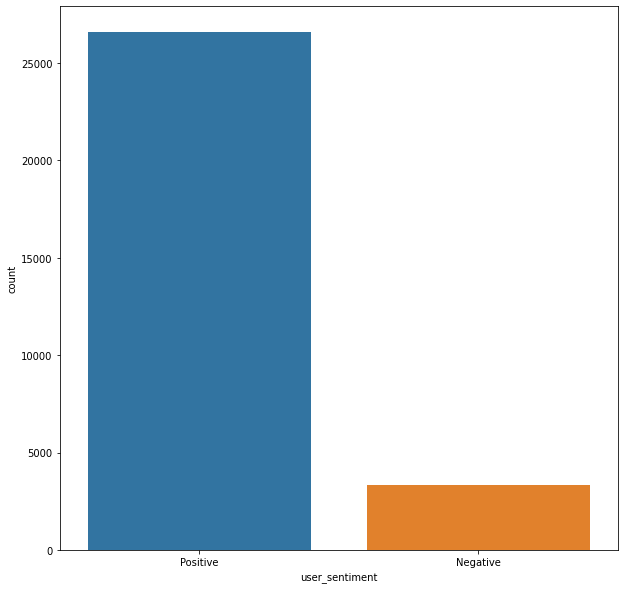

In [104]:
#plotting application data distribution
plt.figure(figsize= (10,10))
sns.countplot(x='user_sentiment', data=df_Classify )
plt.show()

In [105]:
#how to train if there are no false values.
df_Classify.user_sentiment.value_counts()

Positive    26580
Negative     3357
Name: user_sentiment, dtype: int64

Text Processing

In [106]:
#converting into string
df_Classify.reviews_text = df_Classify.reviews_text.astype('str')

In [107]:
# Remove punctuation 
df_Classify.reviews_text= df_Classify.reviews_text.str.replace('[^\w\s]','')

In [108]:
# Remove Stopwords
stop = stopwords.words('english')
df_Classify.reviews_text= df_Classify.reviews_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [109]:
df_Classify.reviews_text

0                                                                                                                                                                                                   love album good hip hop side current pop sound SO HYPE listen everyday gym give 5star rating way metaphors crazy
1                                                                                                                                                                                                                                                                   Good flavor This review collected part promotion
2                                                                                                                                                                                                                                                                                                        Good flavor
3        I read reviews looking buying one couples lubricants ultimately 

In [110]:
def scrub_words(text):
    """Basic cleaning of texts."""
    #remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    #remove whitespace
    text = text.strip()
    text = re.sub(' +', ' ',text)
    
    return text

In [111]:
df_Classify.reviews_text=df_Classify.reviews_text.apply(lambda x: scrub_words(x))

In [112]:
df_Classify.reviews_text= df_Classify.reviews_text.str.lower()

In [113]:
df_Classify.reviews_text

0                                                                                                                                                                                                    love album good hip hop side current pop sound so hype listen everyday gym give star rating way metaphors crazy
1                                                                                                                                                                                                                                                                   good flavor this review collected part promotion
2                                                                                                                                                                                                                                                                                                        good flavor
3        i read reviews looking buying one couples lubricants ultimately 

Lemmatize

In [114]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [115]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [116]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [117]:
#split into x and y
x=df_Classify.reviews_text
y=df_Classify.user_sentiment

Split into train and test

In [118]:
# Split the dataset into test and train
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [119]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',    # Remove accents and perform other character normalization during the preprocessing step. 
    analyzer='word',            # Whether the feature should be made of word or character n-grams.
    token_pattern=r'\w{1,}',    # Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'
    ngram_range=(1, 3),         # The lower and upper boundary of the range of n-values for different n-grams to be extracted
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(X_train)    # Fiting it on Train
train_word_features = word_vectorizer.transform(X_train)  # Transform on Train

In [120]:
## transforming the train and test datasets
X_train_transformed = word_vectorizer.transform(X_train.tolist())
X_test_transformed = word_vectorizer.transform(X_test.tolist())

# # Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (20955, 382879)
y_train (20955,)
X_test_transformed (8982, 382879)
y_test (8982,)


In [121]:
# Build the Logistic Regression model.
logit = LogisticRegression()
logit.fit(X_train_transformed,y_train)

LogisticRegression()

In [122]:
# Prediction Train Data
y_pred_train= logit.predict(X_train_transformed)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Logistic Regression accuracy 0.9013600572655691
              precision    recall  f1-score   support

    Negative       0.10      1.00      0.19       243
    Positive       1.00      0.90      0.95     20712

    accuracy                           0.90     20955
   macro avg       0.55      0.95      0.57     20955
weighted avg       0.99      0.90      0.94     20955



In [123]:
# Prediction Test Data
y_pred_test = logit.predict(X_test_transformed)

#Model Performance on Test Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Logistic Regression accuracy 0.8897795591182365
              precision    recall  f1-score   support

    Negative       0.06      0.89      0.12        75
    Positive       1.00      0.89      0.94      8907

    accuracy                           0.89      8982
   macro avg       0.53      0.89      0.53      8982
weighted avg       0.99      0.89      0.93      8982



Class imbalance handling

In [124]:
counter = Counter(y_train)
print('Before',counter)
# download imblearn library
sm = SMOTE()

# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'Positive': 18647, 'Negative': 2308})
After Counter({'Positive': 18647, 'Negative': 18647})


In [125]:
# Building the Logistic Regression model on imbalance handled data
logit_sm = LogisticRegression()
logit_sm.fit(X_train_transformed_sm,y_train_sm)

LogisticRegression()

In [126]:
# Prediction Train Data
y_pred_train_sm= logit_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

Logistic Regression accuracy 0.984152946854722
              precision    recall  f1-score   support

    Negative       1.00      0.97      0.98     19156
    Positive       0.97      1.00      0.98     18138

    accuracy                           0.98     37294
   macro avg       0.98      0.98      0.98     37294
weighted avg       0.98      0.98      0.98     37294



In [127]:
# Prediction Test Data
y_pred_test = logit_sm.predict(X_test_transformed)

print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Logistic Regression accuracy 0.9266310398574927
              precision    recall  f1-score   support

    Negative       0.57      0.74      0.65       810
    Positive       0.97      0.95      0.96      8172

    accuracy                           0.93      8982
   macro avg       0.77      0.84      0.80      8982
weighted avg       0.94      0.93      0.93      8982

[[ 600  210]
 [ 449 7723]]


Building Random Forest model

In [128]:
classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier(n_jobs=-1, random_state=50)

In [129]:
# Prediction Train Data
y_pred_train= classifier.predict(X_train_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Random Forest Model accuracy 0.9996182295394894
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2306
    Positive       1.00      1.00      1.00     18649

    accuracy                           1.00     20955
   macro avg       1.00      1.00      1.00     20955
weighted avg       1.00      1.00      1.00     20955



Overfitting

In [130]:
# Prediction Test Data
y_pred_test = classifier.predict(X_test_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Random Forest Model accuracy 0.912268982409263
              precision    recall  f1-score   support

    Negative       0.33      0.81      0.46       421
    Positive       0.99      0.92      0.95      8561

    accuracy                           0.91      8982
   macro avg       0.66      0.86      0.71      8982
weighted avg       0.96      0.91      0.93      8982



Naive bayes

select top 5 recommendations from 20

In [131]:
# Take the user ID as input 06stidriver
user_input = input("Enter your user name")
print(user_input)
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

Enter your user name06stidriver
06stidriver


name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                                  25.000000
Clorox Disinfecting Bathroom Cleaner                                                                        0.674485
Newman's Own Organics Licorice Twist, Black 5oz                                                             0.022082
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel                                             0.019124
Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz                                                  0.018986
D-Con Mice Bait Station - 3ct                                                                               0.012838
Queen Helene Cocoa Butter Solid                                                                             0.011672
Stander Pt Bedcane - Bed Handle                                                                             0.009876
Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espre

In [132]:
#function to get reviews based on product name
def getProductReview(name):
  out=0
  count=0
  final=0
  df_value=sample[sample['name'] ==name]
  df_value=df_value['reviews_text']
  for i in df_value:
    out=out+getSentimentScore(word_vectorizer.transform([i]))
    count=count+1
  final=out/count
  return final



In [133]:
def getSentimentScore(review_text):
  intScore=0
  score=logit_sm.predict(review_text)
  if score=='Positive':
    intScore=1
  if(score=='Negetive'):
    intScore=-1
  return intScore




In [134]:

user_choices=pd.DataFrame(data=d,columns=['06stidriver'])
user_choices = user_choices.reset_index()
user_choices['sentiment_score']=user_choices['name'].apply(lambda x:getProductReview(x))
user_choices

,name,06stidriver,sentiment_score
0,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,25.000000,0.911554
1,Clorox Disinfecting Bathroom Cleaner,0.674485,0.915645
2,"Newman's Own Organics Licorice Twist, Black 5oz",0.022082,0.666667
3,Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,0.019124,1.000000
4,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,0.018986,0.965517
5,D-Con Mice Bait Station - 3ct,0.012838,0.714286
6,Queen Helene Cocoa Butter Solid,0.011672,0.777778
7,Stander Pt Bedcane - Bed Handle,0.009876,0.636364
8,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",0.008853,0.900000
9,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,0.007807,0.833333


In [135]:
#select top 5 recommendations based on sentiment score
final_recommend=user_choices.sort_values('sentiment_score',ascending=False)
final_recommend=final_recommend.head(5)
print(final_recommend)

                                                                              name  \
3                  Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel   
14                                                            Kind Nut Delight Bar   
15  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
4                       Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
10             Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   

    06stidriver  sentiment_score  
3      0.019124         1.000000  
14     0.006048         1.000000  
15     0.005794         0.973862  
4      0.018986         0.965517  
10     0.006839         0.930009  
